In [8]:
%%html
<img src="https://cf-assets1.tenlong.com.tw/images/112640/original/9789864761982.jpg" style="height:350px; vertical-align: middle;">

In [3]:
import pandas
salary = pandas.read_csv('datas/STOCK_DAY.csv', index_col = 0)
salary.head()

,total,money,open,high,low,close,range,number,Unnamed: 9
date,,,,,,,,,
107/05/02,87000,"9,600,500",111.0,112.0,109.5,109.5,-0.5,86,NaN
107/05/03,112002,"12,204,220",109.0,110.5,108.0,108.5,-1.0,109,NaN
107/05/04,102000,"11,228,500",109.0,111.5,108.0,110.0,1.5,88,NaN
107/05/07,281135,"31,981,200",113.0,115.5,111.0,115.0,5.0,257,NaN
107/05/08,275050,"31,810,425",115.0,116.5,115.0,116.0,1.0,212,NaN


In [8]:
%%html
<img src="datas/Simple Linear.jpg" style="height:100px; vertical-align: middle;">

### BootStrap

### 正則化

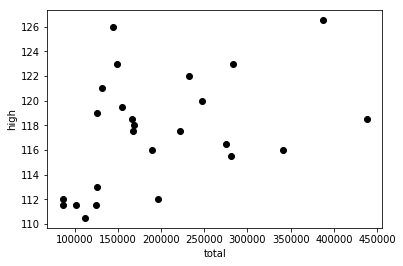

In [4]:
from matplotlib import pyplot as plt
X = salary[['total']]
Y = salary['high']

plt.scatter(X['total'],Y,color='black')
plt.xlabel('total')
plt.ylabel('high')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
import numpy 
regr=LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

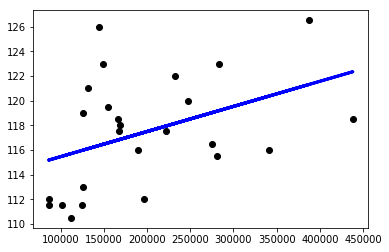

In [6]:
plt.scatter(X['total'],Y,color='black' )
Y_ = regr.predict(X)
plt.plot(X['total'],Y_,color='blue',linewidth=3)
plt.show()

In [10]:
stock = pandas.concat([salary,pandas.get_dummies(salary['high']), pandas.get_dummies(salary['low'])], axis  = 1)

In [12]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X = stock[['total', 'open', 'high', 'close', 'range','number']]
y = stock['close'].values

In [13]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
%%html
<img src="datas/Multiple Regression.jpg" style="height:100px; vertical-align: middle;">

###  SVM影片 https://www.youtube.com/watch?time_continue=42&v=3liCbRZPrZA